In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
session.query(Measurements.date).order_by(Measurements.date).first()


('2010-01-01',)

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23',)

In [32]:
# Perform a query to retrieve the data and precipitation scores
one_year_before = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date >= '2016-08-23').\
    order_by(Measurements.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(one_year_before,columns=['date','prcp'])
prcp_df['date'] = pd.to_datetime(prcp_df['date'])
prcp_df.set_index('date',inplace=True)

# Sort the dataframe by date
prcp_df.sort_values('date',ascending=True)

#taking rows that aren't NaN instead of dropping
prcp_df = prcp_df[prcp_df['prcp'].notna()]
prcp_df.head(11)


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


(array([17045., 17106., 17167., 17226., 17287., 17348., 17410.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

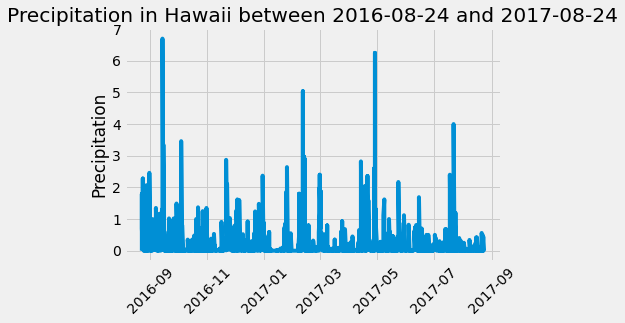

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data
fig = plt.plot(prcp_df)
plt.ylabel('Precipitation')
plt.title('Precipitation in Hawaii between 2016-08-24 and 2017-08-24')
plt.xticks(rotation=45)

# ax = plt.subplots(1, 1) 
# ax.xaxis.set_major_locator(MonthLocator())
# ax.xaxis.set_major_formatter(DateFormatter('%b'))

In [34]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number stations in the dataset
session.query(Stations.station).count()

9

In [36]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active = session.query(Measurements.station,func.count(Measurements.station)).\
    group_by(Measurements.station).all()

In [37]:
#finds the station with the most records w/o having to look at the list that 'active' returns
max(active,key=lambda x:x[1])

('USC00519281', 2772)

In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp = session.query(Measurements.date,func.max(Measurements.tobs)).\
    filter(Measurements.station == 'USC00519281').all()

min_temp = session.query(Measurements.date,func.min(Measurements.tobs)).\
    filter(Measurements.station == 'USC00519281').all()

avg_temp = session.query(Measurements.date,func.avg(Measurements.tobs)).\
    filter(Measurements.station == 'USC00519281').all()

#same numbers, but all in one query
temp_stats = session.query(func.max(Measurements.tobs),func.min(Measurements.tobs),func.avg(Measurements.tobs)).\
    filter(Measurements.station == 'USC00519281').all()

print(f'Highest, Lowest, and Average Temperature: {temp_stats}')

print(f'Highest Temp: {max_temp}')
print(f'Lowest Temp: {min_temp}')
print(f'Average Temp: {avg_temp}')


Highest, Lowest, and Average Temperature: [(85.0, 54.0, 71.66378066378067)]
Highest Temp: [('2015-09-10', 85.0)]
Lowest Temp: [('2013-01-16', 54.0)]
Average Temp: [('2010-01-01', 71.66378066378067)]


In [39]:
#looking for most recent entry for id USC00519281
session.query(Measurements.date).\
    filter(Measurements.station == 'USC00519281').\
        order_by(Measurements.date.desc()).first()

('2017-08-18',)

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
recent_12 = session.query(Measurements.date,Measurements.tobs).\
    filter(Measurements.date >= '2016-08-18').\
        filter(Measurements.station == 'USC00519281').all()

tobs_df = pd.DataFrame(recent_12,columns=['Date', 'Temp (F)'])
tobs_df.set_index('Date',inplace=True)
tobs_df.head(11)

,Temp (F)
Date,
2016-08-18,80.0
2016-08-19,79.0
2016-08-20,81.0
2016-08-21,79.0
2016-08-22,78.0
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0


Text(0.5, 1.0, 'Frequency of Temperatures in Hawaii Recorded by Waihee 837.5 Station')

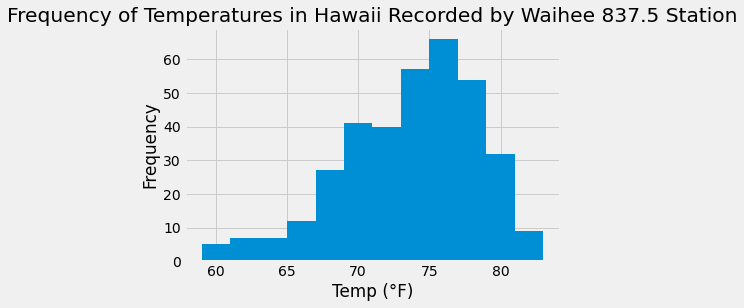

In [41]:
#plot the results as a histogram
plt.hist(tobs_df,bins=12)
plt.xlabel('Temp (°F)')
plt.ylabel('Frequency')
plt.title('Frequency of Temperatures in Hawaii Recorded by Waihee 837.5 Station')

# Close session

In [42]:
# Close Session
session.close()